In [1]:
import sys
sys.path.append("../..") # adds higher directory to python modules path
from src.pypm import metrics, data_io, indicators
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

awu = data_io.load_eod_data('AWU')
bmg = data_io.load_eod_data('BMG')
cuu = data_io.load_eod_data('CUU')


def plot_function(series_dict: dict, x_lab: str="date", y_lab: str="price"):
    """
    Args:
        series_dict (dict): dictionary of data series, where key is the label name.
    """

    for d in series_dict:
        plt.plot(series_dict[d], label=d)

    plt.legend()
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.gcf().autofmt_xdate()
    plt.grid()
    plt.show()

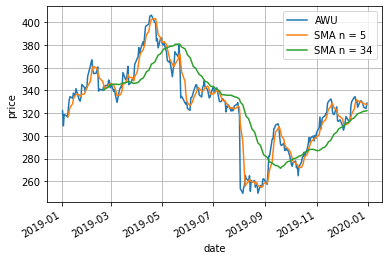

In [2]:
#  Figure 3.1:

price_series = awu["close"]["2019-01":"2020-01"]

SMA5 = indicators.calculate_simple_moving_average(price_series, n=5)
SMA34 = indicators.calculate_simple_moving_average(price_series, n=34)

stonks = {"AWU": price_series,
          "SMA n = 5": SMA5,
          "SMA n = 34": SMA34}
plot_function(stonks)


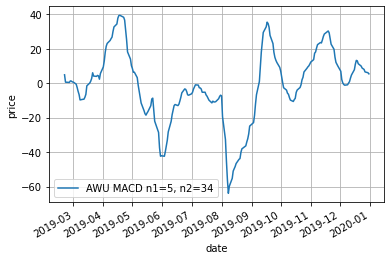

In [3]:
#  Figure 3.4:

price_series = awu["close"]["2019-01":"2020-01"]

macd = indicators.calculate_macd_oscillator(price_series)

stonks = {"AWU MACD n1=5, n2=34": macd}
plot_function(stonks)

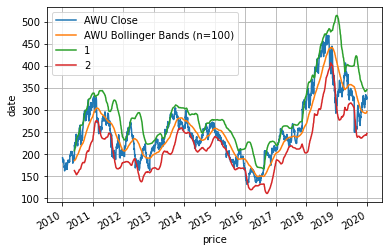

In [35]:


# figure 3.5:
awu = data_io.load_eod_data('AWU')
price_series = awu["close"]

boil = indicators.calculate_bollinger_bands(price_series, n=100)
stonks = {"AWU Close": price_series,
          "AWU Bollinger Bands (n=100)": boil["middle"],
          "1": boil["upper"],
          "2": boil["lower"]
          }


for d in stonks:
    plt.plot(stonks[d], label=d)

plt.legend()
plt.xlabel("price")
plt.ylabel("date")
plt.gcf().autofmt_xdate()
plt.grid()

plt.show()


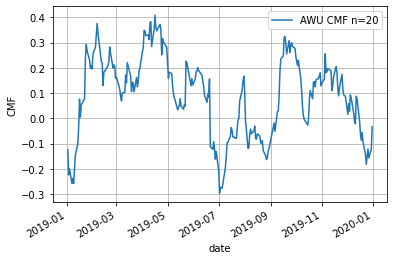

In [42]:
#  Figure 3.6:

price_series = awu["2018-12":"2020-01"]

cmf = indicators.calculate_chaikin_money_flow(price_series, n=20)


stonks = {"AWU CMF n=20": cmf}
plot_function(stonks, y_lab="CMF")